In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [148]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4f/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [149]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.987293,0.000000,0.000000,0.000000,0.000000,0.000000,1.561414,0.000000,0.333333,...,0,27,0.333333,0.000000,0,,0,,0.500000,YES
1,0.000000,1.686665,0.000000,0.000000,0.000000,0.000000,0.000000,2.706102,0.000583,0.504683,...,0,27,1.000000,0.000000,0,,0,,0.333333,NO
2,0.999996,1.961847,2.177694,3.867700,0.006142,0.465936,0.078281,4.375355,0.001715,0.802840,...,1,24,0.800000,0.201880,0,,0,,0.250000,UNKNOWN
3,0.000000,2.096811,0.000000,0.000000,0.000000,0.000000,0.000000,4.503376,0.000000,1.000000,...,0,38,1.000000,0.000000,0,,0,,0.333333,YES
4,0.999966,1.949269,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,1,13,0.600000,0.361016,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,1.899769,1.805037,3.849615,0.003770,0.329502,0.101549,3.587219,0.000579,0.665900,...,1,16,0.200000,0.187846,0,,0,,0.500000,UNKNOWN
796,0.000000,1.995458,0.000000,0.000000,0.000000,0.000000,0.000000,4.165892,0.000000,0.888889,...,0,23,1.000000,0.000000,0,,0,,0.666667,YES
797,0.000000,1.491480,0.000000,0.000000,0.000000,0.000000,0.000000,3.157142,0.000000,0.666667,...,0,19,0.333333,0.000000,0,,0,,0.500000,UNKNOWN
798,0.000000,1.666819,0.000000,0.000000,0.000000,0.000000,0.000000,3.808481,0.000000,0.800000,...,0,22,0.400000,0.000000,0,,0,,1.000000,NO


In [150]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'verbT', 'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [151]:
#train["entropias"]=train["entropias"]/train["entropia_total"]

<Axes: title={'center': 'overlap_ent'}, xlabel='clases'>

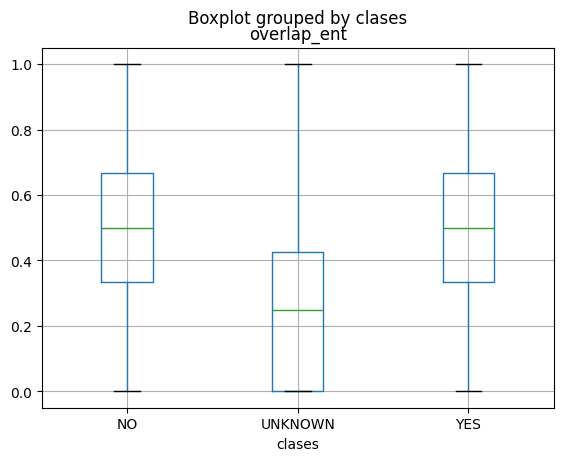

In [152]:
train.boxplot(by="clases",column=["overlap_ent"])

In [232]:
import scipy.stats as stats
for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor)
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

Hay una diferencia significativa entre los grupos. distancias 2.4544755098361816e-19
Hay una diferencia significativa entre los grupos. entropia_total 5.427805075425803e-14
Hay una diferencia significativa entre los grupos. entropias 6.743234775914034e-16
Hay una diferencia significativa entre los grupos. mutinf 2.609856178519026e-16
Hay una diferencia significativa entre los grupos. mearts 4.995636968233247e-15
Hay una diferencia significativa entre los grupos. max_info 1.5492390681722939e-06
Hay una diferencia significativa entre los grupos. sumas 1.5213983551901736e-05
No hay evidencia de una diferencia significativa entre los grupos. mutinf_t
Hay una diferencia significativa entre los grupos. mearts_t 2.0846220503810088e-27
Hay una diferencia significativa entre los grupos. max_info_t 2.5294339050383294e-27
Hay una diferencia significativa entre los grupos. sumas_t 1.3121804008347452e-05
No hay evidencia de una diferencia significativa entre los grupos. list_comp
Hay una diferencia

In [238]:
from scipy.stats import ks_2samp

for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba t de dos muestras independientes
    stat, p_valor = ks_2samp(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor)
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

Hay una diferencia significativa entre los grupos. distancias 9.847158273390679e-19
Hay una diferencia significativa entre los grupos. entropia_total 7.535641215864527e-18
Hay una diferencia significativa entre los grupos. entropias 7.535641215864527e-18
Hay una diferencia significativa entre los grupos. mutinf 6.3663076711881915e-21
Hay una diferencia significativa entre los grupos. mearts 9.847158273390679e-19
Hay una diferencia significativa entre los grupos. max_info 7.535641215864527e-18
Hay una diferencia significativa entre los grupos. sumas 1.5862810166585427e-17
Hay una diferencia significativa entre los grupos. mutinf_t 8.815143106624332e-13
Hay una diferencia significativa entre los grupos. mearts_t 4.4437202355167654e-30
Hay una diferencia significativa entre los grupos. max_info_t 2.861036498099931e-22
Hay una diferencia significativa entre los grupos. sumas_t 2.083727886348608e-05
No hay evidencia de una diferencia significativa entre los grupos. list_comp
Hay una diferen

In [239]:
from scipy.stats import mannwhitneyu

for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba t de dos muestras independientes
    stat, p_valor = mannwhitneyu(grupo_a, grupo_b, use_continuity=False)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor)
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

Hay una diferencia significativa entre los grupos. distancias 1.7458957689663957e-14
Hay una diferencia significativa entre los grupos. entropia_total 8.305103232662844e-12
Hay una diferencia significativa entre los grupos. entropias 2.2559622845109157e-11
Hay una diferencia significativa entre los grupos. mutinf 8.04275666757812e-10
Hay una diferencia significativa entre los grupos. mearts 6.98118100886752e-18
Hay una diferencia significativa entre los grupos. max_info 2.5388212163674642e-09
Hay una diferencia significativa entre los grupos. sumas 2.8197538297530464e-08
Hay una diferencia significativa entre los grupos. mutinf_t 4.2328733326981365e-08
Hay una diferencia significativa entre los grupos. mearts_t 1.4984592025442916e-32
Hay una diferencia significativa entre los grupos. max_info_t 3.900745705803923e-27
Hay una diferencia significativa entre los grupos. sumas_t 2.9314314527026953e-06
No hay evidencia de una diferencia significativa entre los grupos. list_comp
Hay una difer

In [155]:
train["entropia_total"]=train["entropias"]*train["entropia_total"]

array([<Axes: title={'center': 'entropias'}, xlabel='clases'>,
       <Axes: title={'center': 'entropia_total'}, xlabel='clases'>],
      dtype=object)

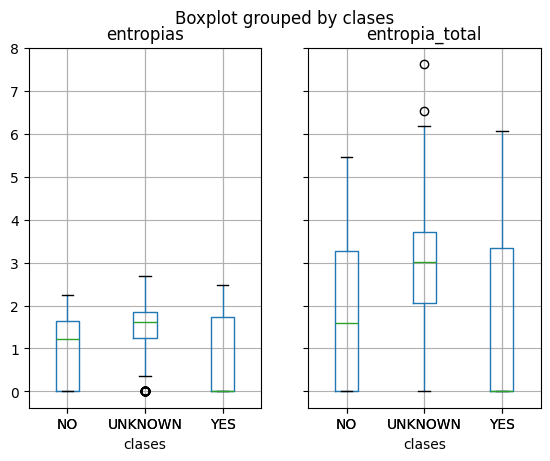

In [156]:
train.boxplot(by="clases",column=["entropias","entropia_total"])

array([<Axes: title={'center': 'entropias'}, xlabel='clases'>,
       <Axes: title={'center': 'entropia_total'}, xlabel='clases'>],
      dtype=object)

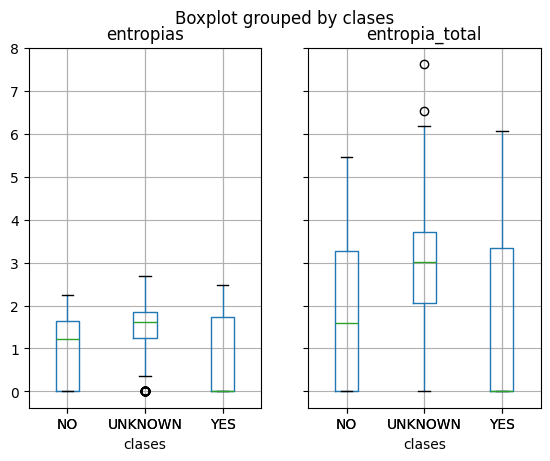

In [157]:
train.boxplot(by="clases",column=["entropias","entropia_total"])

# Integrar características

In [158]:
# train["mutinf"]=train["mutinf"]/train["mutinf_t"]
# train["max_info"]=train["max_info"]/train["max_info_t"]
# train["mearts"]=train["mearts"]/train["mearts_t"]
# #train["entropias"]=train["entropias"]/train["entropia_total"]
# train["sumas"]=train["sumas"]/train["sumas_t"]
# train["list_m"]=train["list_m"]/train["list_M"]
# train=train.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
#                   "mearts_t","sumas_t","list_M"],axis=1)

In [159]:
# train["mearts"]=train["mearts"]*train["distancias"]
# train=train.drop(["distancias","list_incomp","negH","max_info"],axis=1)

In [160]:
train=train.drop(["verbT","verbH","KL_divergence"],axis=1)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.561414,0.000000,0.333333,...,0,0.000000,3,0,27,0.333333,0,0,0.500000,YES
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.706102,0.000583,0.504683,...,0,0.000000,5,0,27,1.000000,0,0,0.333333,NO
2,0.999996,4.272303,2.177694,3.867700,0.006142,0.465936,0.078281,4.375355,0.001715,0.802840,...,0,0.721928,5,1,24,0.800000,0,0,0.250000,UNKNOWN
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.503376,0.000000,1.000000,...,0,0.000000,4,0,38,1.000000,0,0,0.333333,YES
4,0.999966,4.272809,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,0,0.721928,5,1,13,0.600000,0,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,3.429152,1.805037,3.849615,0.003770,0.329502,0.101549,3.587219,0.000579,0.665900,...,0,0.721928,5,1,16,0.200000,0,0,0.500000,UNKNOWN
796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.165892,0.000000,0.888889,...,0,0.000000,9,0,23,1.000000,0,0,0.666667,YES
797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.157142,0.000000,0.666667,...,0,0.000000,3,0,19,0.333333,0,0,0.500000,UNKNOWN
798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.808481,0.000000,0.800000,...,0,0.000000,5,0,22,0.400000,0,0,1.000000,NO


In [161]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [162]:
#train.boxplot(by="clases",column=["max_info_t","max_info","dif_max_info"])

## Eliminar características

In [163]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.561414,0.000000,0.333333,...,0,0.000000,3,0,27,0.333333,0,0,0.500000,YES
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.706102,0.000583,0.504683,...,0,0.000000,5,0,27,1.000000,0,0,0.333333,NO
2,0.999996,4.272303,2.177694,3.867700,0.006142,0.465936,0.078281,4.375355,0.001715,0.802840,...,0,0.721928,5,1,24,0.800000,0,0,0.250000,UNKNOWN
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.503376,0.000000,1.000000,...,0,0.000000,4,0,38,1.000000,0,0,0.333333,YES
4,0.999966,4.272809,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,0,0.721928,5,1,13,0.600000,0,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,3.429152,1.805037,3.849615,0.003770,0.329502,0.101549,3.587219,0.000579,0.665900,...,0,0.721928,5,1,16,0.200000,0,0,0.500000,UNKNOWN
796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.165892,0.000000,0.888889,...,0,0.000000,9,0,23,1.000000,0,0,0.666667,YES
797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.157142,0.000000,0.666667,...,0,0.000000,3,0,19,0.333333,0,0,0.500000,UNKNOWN
798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.808481,0.000000,0.800000,...,0,0.000000,5,0,22,0.400000,0,0,1.000000,NO


In [164]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [165]:
# train=train.drop(["verbT","verbH","KL_divergence"],axis=1)

In [166]:
# train = train[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]
# train

In [167]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [168]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [169]:
train_m

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,diferencias,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
distancias,1.000000,0.855685,0.902692,0.961710,0.652664,0.674153,0.683044,0.057352,0.504593,-0.421162,...,0.520688,0.106254,0.841181,0.103283,0.573108,-0.086450,-0.363802,-0.029970,0.023692,-0.323362
entropia_total,0.855685,1.000000,0.976087,0.903380,0.484934,0.845156,0.873623,0.121299,0.402438,-0.263948,...,0.488400,0.142552,0.821535,0.097261,0.542758,-0.068506,-0.344962,-0.002587,0.027109,-0.273550
entropias,0.902692,0.976087,1.000000,0.952990,0.512478,0.861346,0.860752,0.044261,0.430086,-0.357608,...,0.519442,0.160321,0.862515,0.094424,0.586607,-0.059638,-0.371454,-0.012635,0.031910,-0.307475
mutinf,0.961710,0.903380,0.952990,1.000000,0.527953,0.804466,0.762559,0.055912,0.406313,-0.388462,...,0.492452,0.122367,0.857076,0.086563,0.564997,-0.047474,-0.355408,-0.022596,0.031902,-0.302173
mearts,0.652664,0.484934,0.512478,0.527953,1.000000,0.369475,0.370263,-0.041716,0.717240,-0.287724,...,0.362332,0.098864,0.551973,0.077779,0.385217,-0.071046,-0.236438,-0.044096,-0.000797,-0.246701
max_info,0.674153,0.845156,0.861346,0.804466,0.369475,1.000000,0.865238,0.043483,0.290194,-0.165738,...,0.343389,0.180534,0.701349,0.033649,0.413388,0.007911,-0.271876,0.017296,0.045869,-0.195276
sumas,0.683044,0.873623,0.860752,0.762559,0.370263,0.865238,1.000000,0.060712,0.298010,-0.173619,...,0.405745,0.146705,0.677112,0.043574,0.402512,-0.151793,-0.267709,0.003339,0.027930,-0.208450
mutinf_t,0.057352,0.121299,0.044261,0.055912,-0.041716,0.043483,0.060712,1.000000,-0.168912,0.717906,...,-0.115895,-0.061658,-0.086780,0.140210,-0.129564,0.080685,0.134337,0.067396,-0.008617,0.140247
mearts_t,0.504593,0.402438,0.430086,0.406313,0.717240,0.290194,0.298010,-0.168912,1.000000,-0.560308,...,0.554819,0.174859,0.533360,0.045396,0.578648,-0.125613,-0.358525,-0.042431,-0.018753,-0.417221
max_info_t,-0.421162,-0.263948,-0.357608,-0.388462,-0.287724,-0.165738,-0.173619,0.717906,-0.560308,1.000000,...,-0.531732,-0.086085,-0.511325,0.032974,-0.588028,0.120425,0.391704,0.062117,0.002037,0.431756


<Axes: >

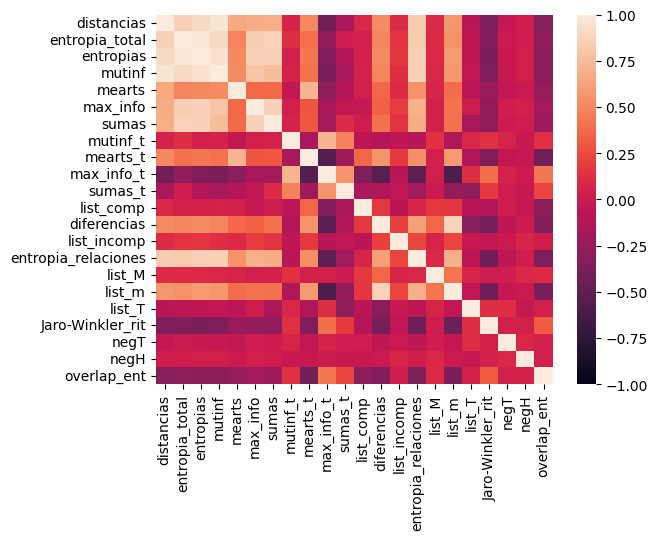

In [170]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [171]:
train_m

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,diferencias,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
distancias,1.000000,0.855685,0.902692,0.961710,0.652664,0.674153,0.683044,0.057352,0.504593,-0.421162,...,0.520688,0.106254,0.841181,0.103283,0.573108,-0.086450,-0.363802,-0.029970,0.023692,-0.323362
entropia_total,0.855685,1.000000,0.976087,0.903380,0.484934,0.845156,0.873623,0.121299,0.402438,-0.263948,...,0.488400,0.142552,0.821535,0.097261,0.542758,-0.068506,-0.344962,-0.002587,0.027109,-0.273550
entropias,0.902692,0.976087,1.000000,0.952990,0.512478,0.861346,0.860752,0.044261,0.430086,-0.357608,...,0.519442,0.160321,0.862515,0.094424,0.586607,-0.059638,-0.371454,-0.012635,0.031910,-0.307475
mutinf,0.961710,0.903380,0.952990,1.000000,0.527953,0.804466,0.762559,0.055912,0.406313,-0.388462,...,0.492452,0.122367,0.857076,0.086563,0.564997,-0.047474,-0.355408,-0.022596,0.031902,-0.302173
mearts,0.652664,0.484934,0.512478,0.527953,1.000000,0.369475,0.370263,-0.041716,0.717240,-0.287724,...,0.362332,0.098864,0.551973,0.077779,0.385217,-0.071046,-0.236438,-0.044096,-0.000797,-0.246701
max_info,0.674153,0.845156,0.861346,0.804466,0.369475,1.000000,0.865238,0.043483,0.290194,-0.165738,...,0.343389,0.180534,0.701349,0.033649,0.413388,0.007911,-0.271876,0.017296,0.045869,-0.195276
sumas,0.683044,0.873623,0.860752,0.762559,0.370263,0.865238,1.000000,0.060712,0.298010,-0.173619,...,0.405745,0.146705,0.677112,0.043574,0.402512,-0.151793,-0.267709,0.003339,0.027930,-0.208450
mutinf_t,0.057352,0.121299,0.044261,0.055912,-0.041716,0.043483,0.060712,1.000000,-0.168912,0.717906,...,-0.115895,-0.061658,-0.086780,0.140210,-0.129564,0.080685,0.134337,0.067396,-0.008617,0.140247
mearts_t,0.504593,0.402438,0.430086,0.406313,0.717240,0.290194,0.298010,-0.168912,1.000000,-0.560308,...,0.554819,0.174859,0.533360,0.045396,0.578648,-0.125613,-0.358525,-0.042431,-0.018753,-0.417221
max_info_t,-0.421162,-0.263948,-0.357608,-0.388462,-0.287724,-0.165738,-0.173619,0.717906,-0.560308,1.000000,...,-0.531732,-0.086085,-0.511325,0.032974,-0.588028,0.120425,0.391704,0.062117,0.002037,0.431756


In [172]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,diferencias,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
distancias,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entropia_total,0.855685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entropias,0.902692,0.976087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mutinf,0.961710,0.903380,0.952990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mearts,0.652664,0.484934,0.512478,0.527953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max_info,0.674153,0.845156,0.861346,0.804466,0.369475,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
sumas,0.683044,0.873623,0.860752,0.762559,0.370263,0.865238,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mutinf_t,0.057352,0.121299,0.044261,0.055912,-0.041716,0.043483,0.060712,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mearts_t,0.504593,0.402438,0.430086,0.406313,0.717240,0.290194,0.298010,-0.168912,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max_info_t,-0.421162,-0.263948,-0.357608,-0.388462,-0.287724,-0.165738,-0.173619,0.717906,-0.560308,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [173]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

entropia_total distancias 0.855685473637888
entropias distancias 0.9026921638367272
entropias entropia_total 0.9760869433451924
mutinf distancias 0.9617101192609337
mutinf entropia_total 0.903379567124888
mutinf entropias 0.9529903828731031
max_info entropia_total 0.8451560420913627
max_info entropias 0.8613457132141044
max_info mutinf 0.8044661990231301
sumas entropia_total 0.8736234111854078
sumas entropias 0.860752378472804
sumas mutinf 0.7625594545892872
sumas max_info 0.865237809224272
mearts_t mearts 0.7172399991063927
max_info_t mutinf_t 0.7179060533365124
entropia_relaciones distancias 0.8411811385322325
entropia_relaciones entropia_total 0.8215354134354351
entropia_relaciones entropias 0.862514803802475
entropia_relaciones mutinf 0.8570760535753373
entropia_relaciones max_info 0.7013492452827395
list_m diferencias 0.873234706132224


In [174]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

In [175]:
# Checar variables colineales
#sns.relplot(data=train_m, x="mutinf", y="sumas")

In [176]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [177]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

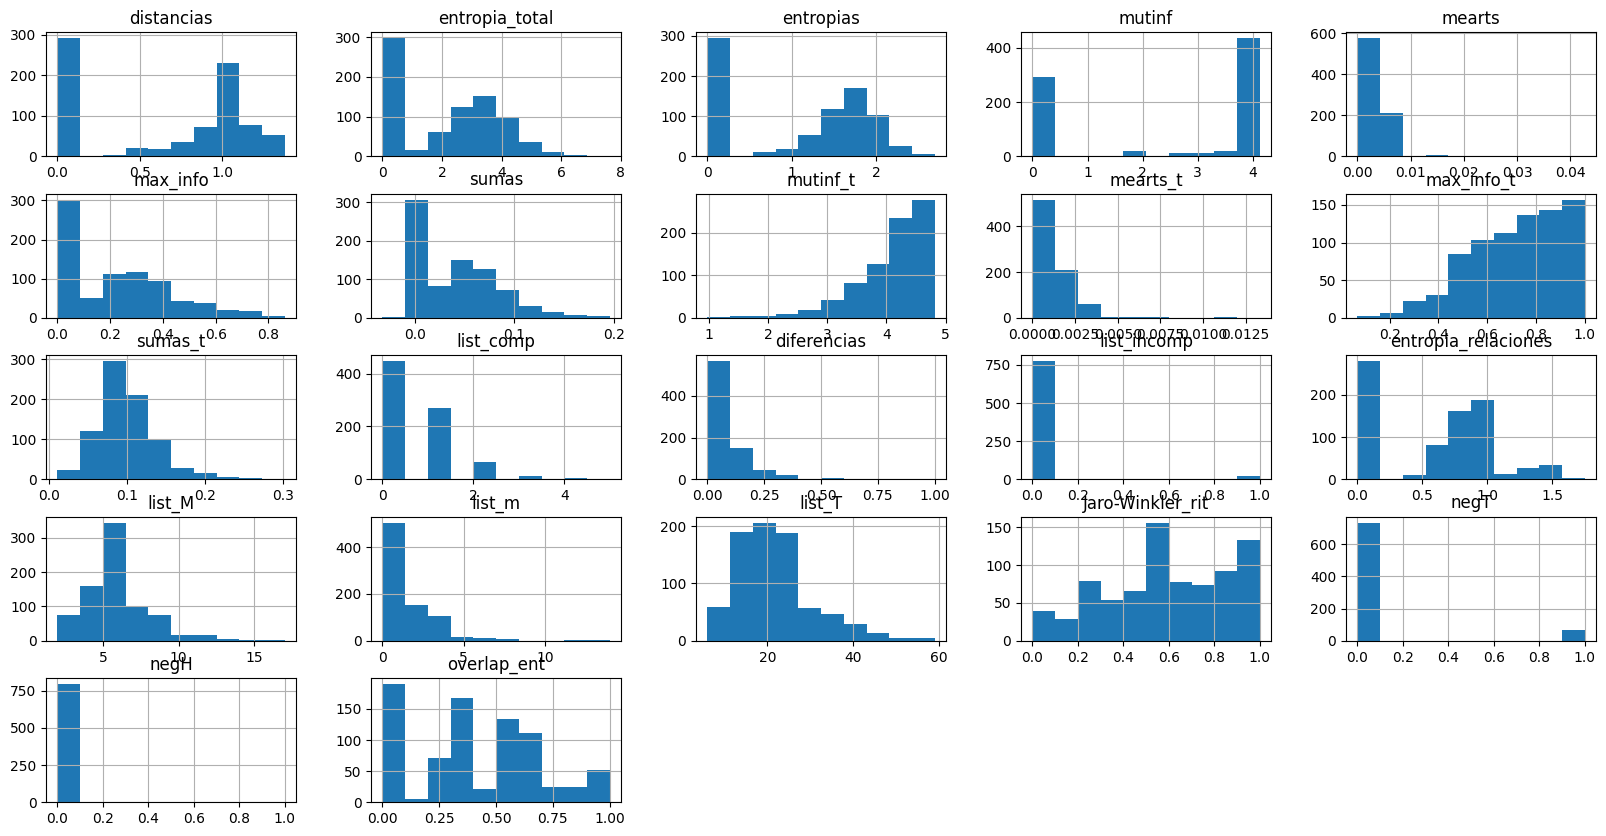

In [178]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [179]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4f/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [180]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,2.230984,0.000000,0.000000,0.000000,0.000000,0.000000,4.434350,0.000691,0.858036,...,0,24,0.400000,0.000000,0,,0,,0.666667,YES
1,0.000000,2.068941,0.000000,0.000000,0.000000,0.000000,0.000000,4.429481,0.000576,0.885372,...,0,24,0.800000,0.000000,0,,0,,0.333333,YES
2,0.000000,1.764581,0.000000,0.000000,0.000000,0.000000,0.000000,3.155371,0.000000,0.750000,...,0,14,0.500000,0.000000,0,,0,,0.666667,YES
3,0.000000,2.011711,0.000000,0.000000,0.000000,0.000000,0.000000,3.957290,0.000000,0.833333,...,0,20,0.666667,0.000000,0,,0,,1.000000,YES
4,1.000001,1.690627,1.860964,3.880129,0.004272,0.201056,0.060806,3.339943,0.000845,0.550264,...,1,20,0.000000,0.597443,0,,0,,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.841464,2.198445,2.205827,3.861241,0.004049,0.631889,0.131074,4.383406,0.001461,0.852755,...,2,19,0.400000,0.167645,1,rush,0,,0.500000,YES
796,0.000000,1.580490,0.000000,0.000000,0.000000,0.000000,0.000000,3.178976,0.000000,0.666667,...,0,25,0.666667,0.000000,0,,0,,0.333333,NO
797,0.000000,1.828157,0.000000,0.000000,0.000000,0.000000,0.000000,4.789178,0.000000,1.000000,...,0,24,0.000000,0.000000,0,,0,,0.666667,UNKNOWN
798,1.319180,1.766603,0.881291,3.781196,0.005778,0.129923,0.036628,4.466536,0.001000,0.782481,...,1,10,0.500000,0.339799,0,,0,,0.666667,UNKNOWN


In [181]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [182]:
# test["mutinf"]=test["mutinf"]/test["mutinf_t"]
# test["max_info"]=test["max_info"]/test["max_info_t"]
# test["mearts"]=test["mearts"]/test["mearts_t"]
# #test["entropias"]=test["entropias"]/test["entropia_total"]
# test["sumas"]=test["sumas"]/test["sumas_t"]
# test["list_m"]=test["list_m"]/test["list_M"]
# test=test.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
#                   "mearts_t","sumas_t","list_M"],axis=1)
test=test.drop(["verbT","verbH","KL_divergence"],axis=1)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,2.230984,0.000000,0.000000,0.000000,0.000000,0.000000,4.434350,0.000691,0.858036,...,0,0.000000,5,0,24,0.400000,0,0,0.666667,YES
1,0.000000,2.068941,0.000000,0.000000,0.000000,0.000000,0.000000,4.429481,0.000576,0.885372,...,0,0.000000,5,0,24,0.800000,0,0,0.333333,YES
2,0.000000,1.764581,0.000000,0.000000,0.000000,0.000000,0.000000,3.155371,0.000000,0.750000,...,0,0.000000,4,0,14,0.500000,0,0,0.666667,YES
3,0.000000,2.011711,0.000000,0.000000,0.000000,0.000000,0.000000,3.957290,0.000000,0.833333,...,0,0.000000,6,0,20,0.666667,0,0,1.000000,YES
4,1.000001,1.690627,1.860964,3.880129,0.004272,0.201056,0.060806,3.339943,0.000845,0.550264,...,0,0.811278,4,1,20,0.000000,0,0,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.841464,2.198445,2.205827,3.861241,0.004049,0.631889,0.131074,4.383406,0.001461,0.852755,...,1,0.721928,5,2,19,0.400000,1,0,0.500000,YES
796,0.000000,1.580490,0.000000,0.000000,0.000000,0.000000,0.000000,3.178976,0.000000,0.666667,...,0,0.000000,6,0,25,0.666667,0,0,0.333333,NO
797,0.000000,1.828157,0.000000,0.000000,0.000000,0.000000,0.000000,4.789178,0.000000,1.000000,...,0,0.000000,3,0,24,0.000000,0,0,0.666667,UNKNOWN
798,1.319180,1.766603,0.881291,3.781196,0.005778,0.129923,0.036628,4.466536,0.001000,0.782481,...,0,0.811278,4,1,10,0.500000,0,0,0.666667,UNKNOWN


In [183]:
# test["mearts"]=test["mearts"]*test["distancias"]
# test=test.drop(["distancias","list_incomp","negH","max_info"],axis=1)

In [184]:
#test = test[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]


In [185]:
# test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

In [186]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [187]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [188]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [189]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.72463906, 0.55979081, 0.80744617, ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.72464186, 0.42640853, 0.64046162, ..., 0.        , 0.        ,
        0.66666667]])

In [190]:
X_train.shape

(800, 22)

In [191]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [192]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [193]:
model.decision_function(X_train)

array([ 0.45275299,  1.08570842,  0.53502371,  1.60116593,  0.57374813,
        1.21541854,  0.73536513, -1.17641985,  1.024574  , -1.72711442,
       -0.20797578,  0.53560973,  1.31229095,  0.0709168 , -0.63588686,
        0.82546189,  0.33318192,  0.64561158, -1.57776965,  0.25358989,
        1.27934729, -0.45136072,  0.42339919,  1.17909248,  0.94182001,
        0.32165219,  0.92777463, -1.09458919,  0.57219175, -0.21352584,
        1.07520348,  0.50038844,  0.55309013,  0.77086664,  0.45010654,
        0.08852056,  1.10457695,  0.48881612,  0.28514814,  1.3257931 ,
        0.81335662, -0.23193367,  0.70783556,  0.34877033, -0.39836899,
        1.09135805,  0.47729533,  1.29755841,  0.56822015,  0.81053657,
       -0.64638018,  0.81703866, -1.76327461,  1.3250768 ,  0.67149903,
        0.38684115,  1.09873326,  0.81730165,  0.3582491 , -0.41219331,
        0.1113228 , -0.18370859,  0.85727359,  0.40261702,  1.24380028,
        0.81262752,  1.05551637, -0.35733967,  0.90841181,  0.24

In [194]:
labels=train.columns[:-1]
labels

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [195]:
model.classes_

array([0, 1])

In [196]:
model.coef_[0]

array([ 0.05275744, -0.40698837,  0.34408243,  0.40400233, -0.65089834,
        0.13503842,  1.1575058 , -0.91071506, -1.50794232,  1.55302525,
        0.01404341,  0.59706919, -0.68372762,  0.48260122, -2.48310033,
       -0.21867858, -1.8343325 ,  0.67916257,  1.00552835, -0.29738193,
       -0.34624272,  0.69561367])

In [197]:
coeficientes=model.coef_[0]

In [198]:
coeficientes

array([ 0.05275744, -0.40698837,  0.34408243,  0.40400233, -0.65089834,
        0.13503842,  1.1575058 , -0.91071506, -1.50794232,  1.55302525,
        0.01404341,  0.59706919, -0.68372762,  0.48260122, -2.48310033,
       -0.21867858, -1.8343325 ,  0.67916257,  1.00552835, -0.29738193,
       -0.34624272,  0.69561367])

In [199]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  9 max_info_t 14 entropia_relaciones


In [200]:

n_columns=train.shape[1]-1

In [201]:
n_columns

22

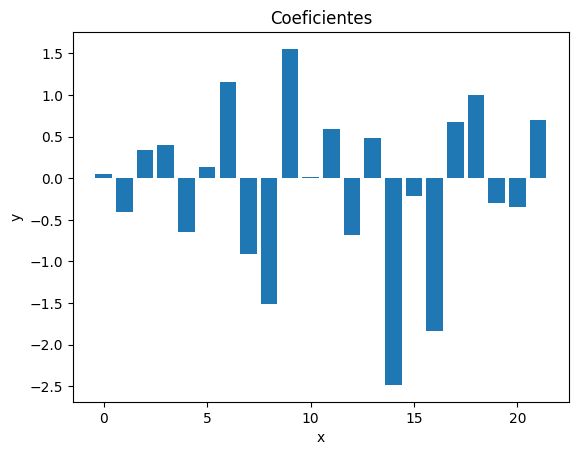

In [202]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [203]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.75516378, 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.70031418, 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.5972915 , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.61881135, 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.96462865, 0.59797602, 0.32312239, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.85923413, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [204]:
X_test.shape

(800, 22)

In [205]:
predictions = model.predict(X_test)

In [206]:
predictions

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [207]:
test["predicciones"]=predictions
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
0,0.000000,2.230984,0.000000,0.000000,0.000000,0.000000,0.000000,4.434350,0.000691,0.858036,...,0.000000,5,0,24,0.400000,0,0,0.666667,YES,1
1,0.000000,2.068941,0.000000,0.000000,0.000000,0.000000,0.000000,4.429481,0.000576,0.885372,...,0.000000,5,0,24,0.800000,0,0,0.333333,YES,1
2,0.000000,1.764581,0.000000,0.000000,0.000000,0.000000,0.000000,3.155371,0.000000,0.750000,...,0.000000,4,0,14,0.500000,0,0,0.666667,YES,1
3,0.000000,2.011711,0.000000,0.000000,0.000000,0.000000,0.000000,3.957290,0.000000,0.833333,...,0.000000,6,0,20,0.666667,0,0,1.000000,YES,1
4,1.000001,1.690627,1.860964,3.880129,0.004272,0.201056,0.060806,3.339943,0.000845,0.550264,...,0.811278,4,1,20,0.000000,0,0,1.000000,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.841464,2.198445,2.205827,3.861241,0.004049,0.631889,0.131074,4.383406,0.001461,0.852755,...,0.721928,5,2,19,0.400000,1,0,0.500000,YES,1
796,0.000000,1.580490,0.000000,0.000000,0.000000,0.000000,0.000000,3.178976,0.000000,0.666667,...,0.000000,6,0,25,0.666667,0,0,0.333333,NO,1
797,0.000000,1.828157,0.000000,0.000000,0.000000,0.000000,0.000000,4.789178,0.000000,1.000000,...,0.000000,3,0,24,0.000000,0,0,0.666667,UNKNOWN,1
798,1.319180,1.766603,0.881291,3.781196,0.005778,0.129923,0.036628,4.466536,0.001000,0.782481,...,0.811278,4,1,10,0.500000,0,0,0.666667,UNKNOWN,0


In [208]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
5,0.999996,1.724093,1.685475,3.831012e+00,0.005715,0.377998,0.090982,3.278925,0.001254,0.594499,...,0.811278,4,1,10,0.500000,0,0,0.666667,YES,0
30,1.000012,1.658665,1.648239,3.820110e+00,0.003708,0.216965,0.030517,3.574200,0.000551,0.643393,...,0.721928,5,1,21,0.400000,0,0,0.750000,YES,0
32,0.999965,1.657144,0.836641,3.823568e+00,0.005280,0.096198,0.029696,3.325708,0.000982,0.524050,...,0.811278,4,1,15,0.500000,0,0,0.666667,YES,0
42,0.999949,1.803001,0.000000,1.111111e-12,0.038242,0.000000,0.000000,3.669758,0.006290,0.678677,...,0.591673,7,1,19,0.428571,0,0,0.500000,YES,0
43,1.000022,1.693689,1.699284,3.971615e+00,0.004929,0.265411,0.067873,4.320052,0.001435,0.706165,...,0.970951,5,2,16,0.600000,0,0,1.000000,YES,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,0.999955,2.358713,0.773228,3.692578e+00,0.006888,0.148445,0.024391,4.378658,0.001643,0.740177,...,0.721928,5,1,13,0.800000,0,0,0.500000,YES,0
733,1.215711,1.923910,0.946373,3.785805e+00,0.005328,0.261018,0.017045,4.412248,0.000623,0.876836,...,0.650022,6,1,14,0.500000,0,0,0.666667,YES,0
738,0.974583,2.125113,1.391836,3.894717e+00,0.004092,0.347146,0.081756,4.331746,0.001442,0.726598,...,0.863121,7,2,12,0.714286,0,0,0.500000,YES,0
743,0.999988,1.787509,1.521815,3.932902e+00,0.004963,0.223007,0.037520,4.405601,0.001533,0.697396,...,0.936667,17,6,16,0.235294,0,0,0.375000,YES,0


In [209]:
print(confusion_matrix(y_test, predictions))

[[236 154]
 [106 304]]


In [210]:
# [[239 151]
#  [124 286]]
# acccuracy:  0.66
# precision:  0.65
# recall 0.7
# f1_score:  0.68
# matthews_score:  0.31

In [211]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.68
precision:  0.66
recall 0.74
f1_score:  0.7
matthews_score:  0.35


In [212]:
# acccuracy:  0.68
# precision:  0.65
# recall 0.79
# f1_score:  0.71
# matthews_score:  0.35

In [213]:
X_train.shape

(800, 22)

In [214]:
X_test.shape

(800, 22)

In [215]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [216]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [217]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.710000 (0.106147)
Logistic Regression Precision:: 0.720000 (0.118139)
Logistic Regression Recall:: 0.790000 (0.081470)
Logistic Regression F1-score:: 0.740000 (0.066817)


In [ ]:
# Logistic Regression Acurracy:: 0.710000 (0.114844)
# Logistic Regression Precision:: 0.720000 (0.121810)
# Logistic Regression Recall:: 0.800000 (0.084588)
# Logistic Regression F1-score:: 0.740000 (0.073147

In [218]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.110110)
Logistic Regression Recall:: 0.710000 (0.106147)
Logistic Regression F1-score:: 0.690000 (0.128007)


In [219]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.109772)
Logistic Regression Recall:: 0.710000 (0.111308)
Logistic Regression F1-score:: 0.690000 (0.130749)


In [220]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.106147)
Logistic Regression Recall:: 0.710000 (0.106147)
Logistic Regression F1-score:: 0.710000 (0.106147)


In [221]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.400000 (0.247340)


In [240]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [56]:
#linear_model

In [81]:
#model = LogisticRegression()
#model.fit(X_train,y_train)

In [241]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.69      0.61      0.64       390
           1       0.66      0.74      0.70       410

    accuracy                           0.68       800
   macro avg       0.68      0.67      0.67       800
weighted avg       0.68      0.68      0.67       800



In [242]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [245]:
test.columns[:-2]

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [246]:
explainer.expected_value

-0.15827618974154967

In [247]:
X_test

array([[0.        , 0.75516378, 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.70031418, 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.5972915 , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.61881135, 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.96462865, 0.59797602, 0.32312239, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.85923413, 0.        , ..., 0.        , 0.        ,
        1.        ]])

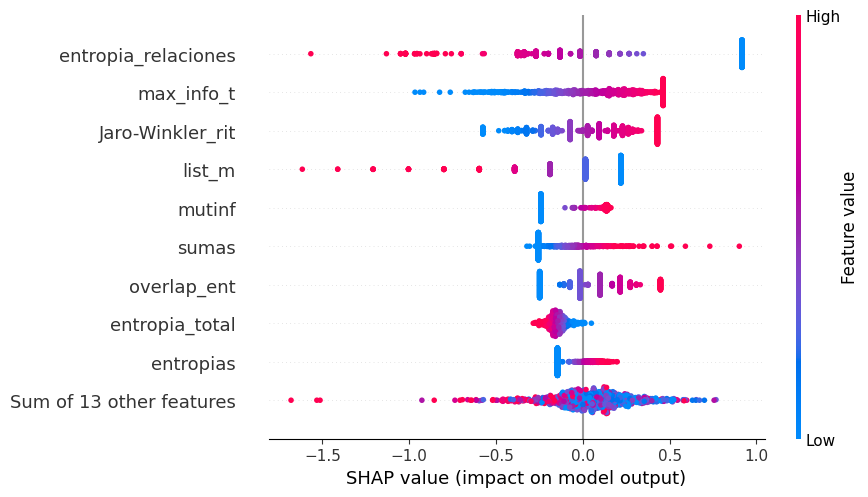

In [248]:
shap.plots.beeswarm(shap_values)

[0.73121437 0.4449395  0.54671232 0.89697426 0.12872182 0.27823834
 0.09448722 0.74559537 0.05217773 0.64995841 0.19549815 0.
 0.05454545 0.         0.37562701 0.29411765 0.11111111 0.39285714
 0.8        0.         0.         0.33333333] 0 1


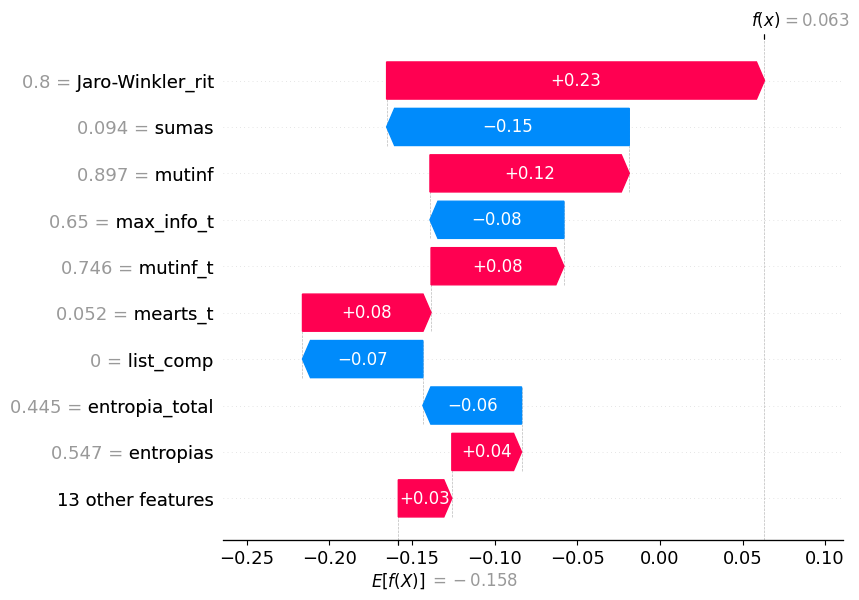

In [249]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [250]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.57687511 0.         0.         0.         0.
 0.         0.75079963 0.         0.79999987 0.21699325 0.
 0.         0.         0.         0.29411765 0.         0.42857143
 1.         0.         0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

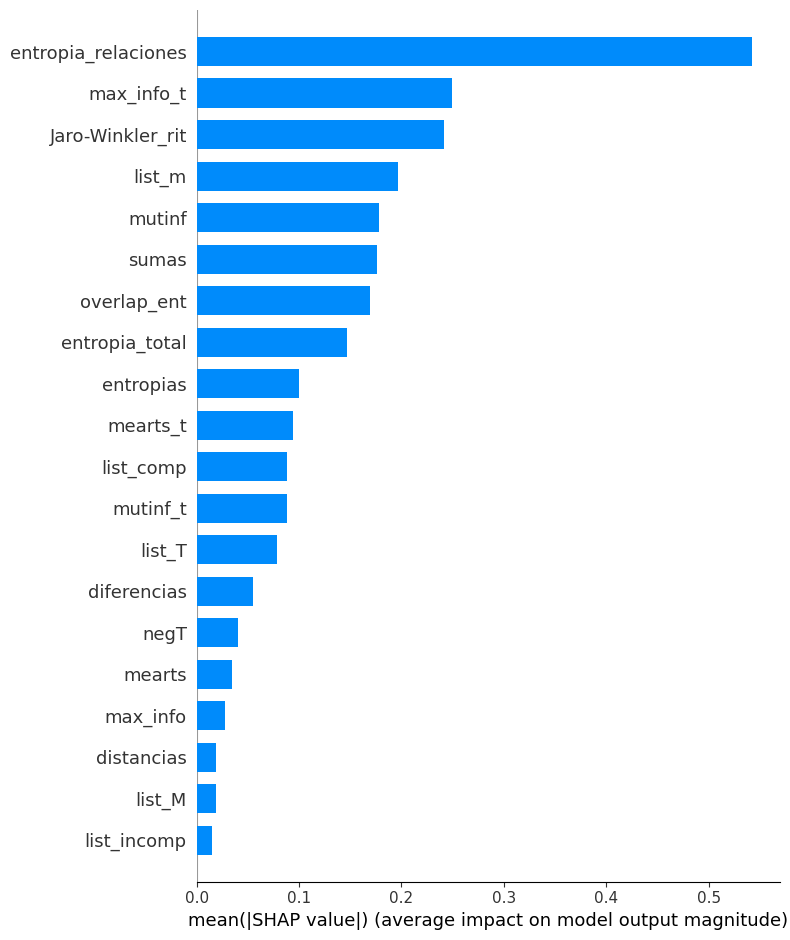

In [251]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

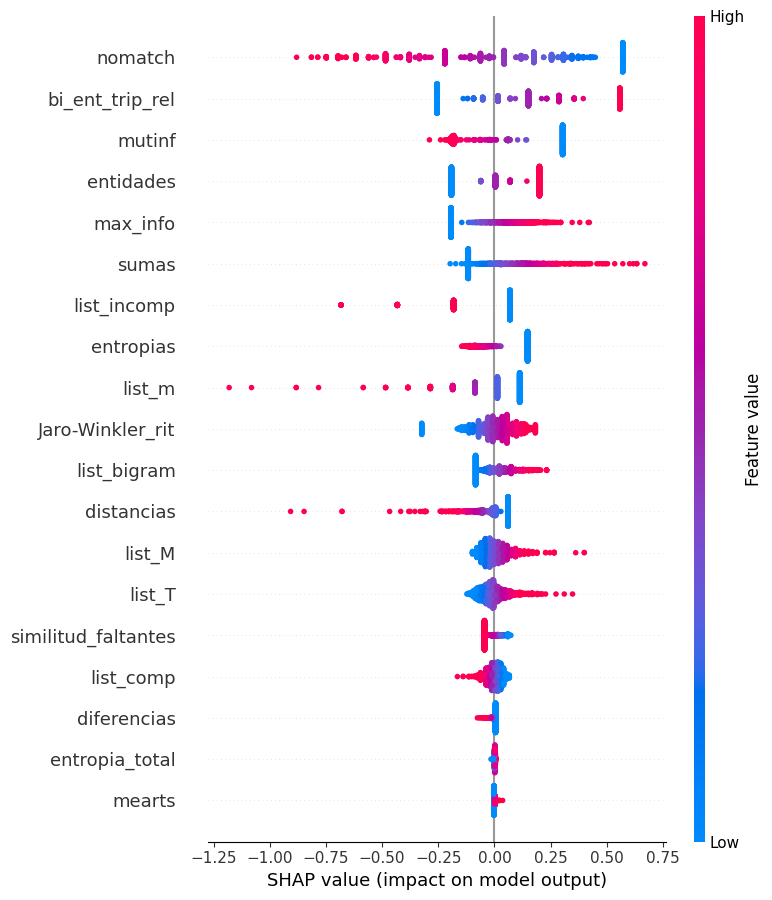

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

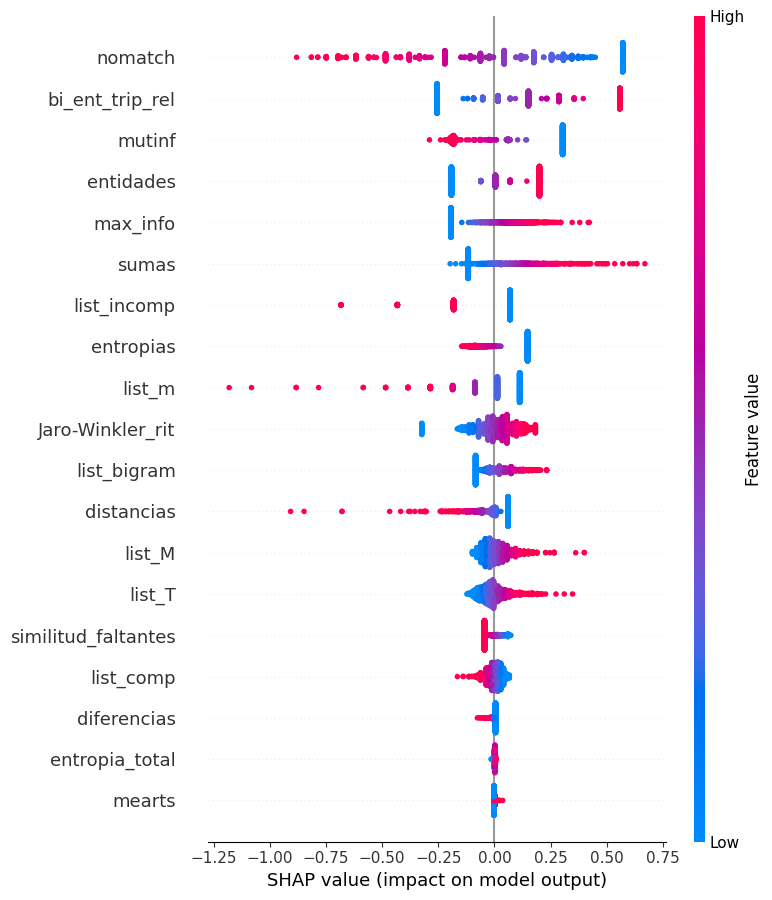

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

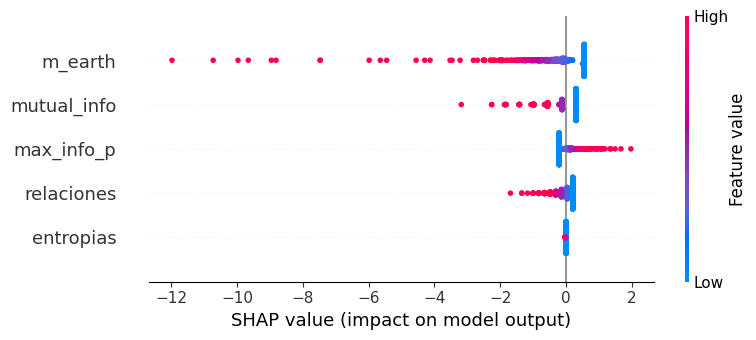

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [197]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [204]:
clf = DecisionTreeClassifier(splitter="random",criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [205]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.65
precision:  0.64
recall 0.72
f1_score:  0.68
matthews_score:  0.3


In [206]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [207]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.620000 (0.038039)
DecisionTree: 0.630000 (0.036153)
DecisionTree: 0.680000 (0.060250)
DecisionTree: 0.650000 (0.030989)


In [202]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[256, 134],
       [183, 227]])

Profundidad del árbol: 22
Número de nodos terminales: 278


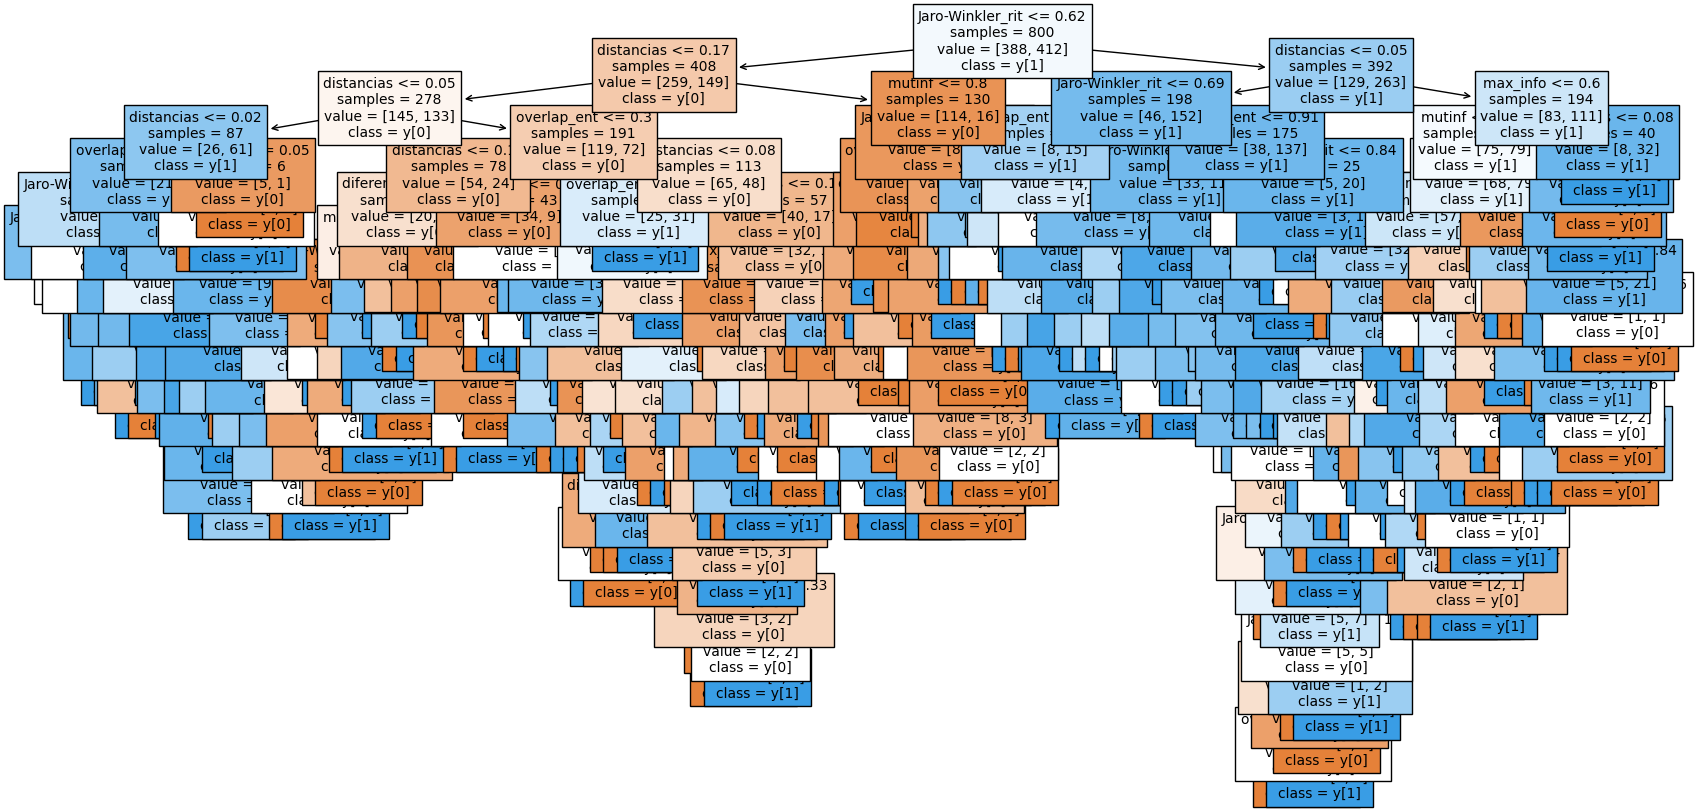

In [203]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )